### Palla Revanth

### 20MAI0046

### Univariate LSTM Example for TimeSeries Problem

### GitHub: https://github.com/revanthpalla/DeepLearning.git

In [15]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [16]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [17]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [18]:
X

array([[110, 125, 133],
       [125, 133, 146],
       [133, 146, 158],
       [146, 158, 172],
       [158, 172, 187],
       [172, 187, 196]])

In [19]:
y

array([146, 158, 172, 187, 196, 210])

In [20]:
X.shape

(6, 3)

In [21]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [22]:
X.shape

(6, 3, 1)

### Building LSTM Model

In [23]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 32213.2871
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 31977.1152
Epoch 3/300
1/1 [==============================] - 0s 6ms/step - loss: 31765.0215
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 31568.6855
Epoch 5/300
1/1 [==============================] - 0s 8ms/step - loss: 31385.3770
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 31208.9824
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 31040.5098
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 30878.2207
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 30721.6348
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 30569.8906
Epoch 11/300
1/1 [==============================] - 0s 3ms/step - loss: 30431.2090
Epoch 12/300
1/1 [==============================] - 0s 5ms/step - loss: 30292.2598
Epoch 13/300


### Predicting for next 10 days

In [34]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0][0])
        yhat_rounded = round(yhat[0][0],2)
        temp_input.append(yhat_rounded)
        lst_output.append(yhat_rounded)
        i=i+1
    

print(lst_output)

222.10014
1 day input [196.        210.        222.1000061]
1 day output [[232.38142]]
2 day input [210.         222.1000061  232.38142395]
2 day output [[244.04764]]
3 day input [222.1     232.38142 244.04764]
3 day output [[254.78491]]
4 day input [232.38142 244.04764 254.78491]
4 day output [[265.05243]]
5 day input [244.04764 254.78491 265.05243]
5 day output [[275.67233]]
6 day input [254.78491 265.05243 275.67233]
6 day output [[285.88684]]
7 day input [265.05243 275.67233 285.88684]
7 day output [[296.0106]]
8 day input [275.67233 285.88684 296.0106 ]
8 day output [[306.20132]]
9 day input [285.88684 296.0106  306.20132]
9 day output [[316.24838]]
[222.1, 232.38142, 244.04764, 254.78491, 265.05243, 275.67233, 285.88684, 296.0106, 306.20132, 316.24838]


In [26]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [27]:
lst_output

[222.10014,
 232.38145,
 244.0477,
 254.78502,
 265.0525,
 275.67242,
 285.88696,
 296.01068,
 306.20142,
 316.24844]

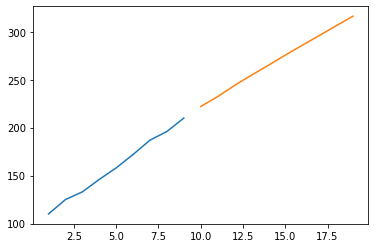

In [31]:
import matplotlib.pyplot as plt


day_new=np.arange(1,10)
day_pred=np.arange(10,20)

plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)